In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Cleaned up data from ETL Project - this file only contains USA gold medal athletes
olympics_file = "Resources/olympics.csv"
olympics = pd.read_csv(olympics_file)
olympics

,id,year,sport,sex,nationality,medal,name
0,0,1976,Aquatics,male,USA,Gold,Philip George Boggs
1,1,1976,Aquatics,female,USA,Gold,Jennifer Kay Chandler
2,2,1976,Aquatics,female,USA,Gold,Shirley Farber Babashoff
3,3,1976,Aquatics,male,USA,Gold,Brian Stuart Goodell
4,4,1976,Aquatics,male,USA,Gold,Matthew Haynes Vogel
...,...,...,...,...,...,...,...
1030,1030,2016,aquatics,male,USA,Gold,Tom Shields
1031,1031,2016,athletics,male,USA,Gold,Tony McQuay
1032,1032,2016,athletics,female,USA,Gold,Tori Bowie
1033,1033,2016,aquatics,male,USA,Gold,Townley Haas


In [3]:
olympics['sex'].value_counts()

male      553
female    482
Name: sex, dtype: int64

In [4]:
# Female athletes only
female = olympics[olympics.sex == "female"]

In [5]:
# Male athletes only
male = olympics[olympics.sex == "male"]

In [6]:
male_count_by_year = male['year'].value_counts()

In [7]:
reset_male = male_count_by_year.reset_index()
reset_male.columns = ['year', 'male']
reset_male

,year,male
0,1984,106
1,2000,68
2,2008,67
3,1996,59
4,1992,57
5,1976,56
6,2004,51
7,1988,49
8,2016,40


In [8]:
female_count_by_year = female['year'].value_counts()

In [9]:
reset_female = female_count_by_year.reset_index()
reset_female.columns = ['year', 'female']
reset_female

,year,female
0,1996,101
1,2016,67
2,2004,65
3,2000,62
4,1984,62
5,2008,58
6,1992,32
7,1988,28
8,1976,7


In [10]:
# Merge the two male and female count by year files for plotting

merge_gender_files = pd.merge(reset_male, reset_female, on="year")
gender_by_year = merge_gender_files
gender_by_year

,year,male,female
0,1984,106,62
1,2000,68,62
2,2008,67,58
3,1996,59,101
4,1992,57,32
5,1976,56,7
6,2004,51,65
7,1988,49,28
8,2016,40,67


In [11]:
gender_by_year.sort_values("year", axis=0, ascending=True, inplace=True, na_position='first')
gender_by_year

,year,male,female
5,1976,56,7
0,1984,106,62
7,1988,49,28
4,1992,57,32
3,1996,59,101
1,2000,68,62
6,2004,51,65
2,2008,67,58
8,2016,40,67


In [12]:
gender_by_year["total"] = gender_by_year.male + gender_by_year.female
gender_by_year

,year,male,female,total
5,1976,56,7,63
0,1984,106,62,168
7,1988,49,28,77
4,1992,57,32,89
3,1996,59,101,160
1,2000,68,62,130
6,2004,51,65,116
2,2008,67,58,125
8,2016,40,67,107


In [13]:
gender_by_year.dtypes

year      int64
male      int64
female    int64
total     int64
dtype: object

In [14]:
# Save the gender_by_year file as a csv file for plotting 
gender_by_year.to_csv("Resources/usaGoldMedals.csv", index=False)

In [15]:
# Create list for plotting
year_list = gender_by_year['year'].tolist()
total_list = gender_by_year['total'].tolist()
male_list = gender_by_year['male'].tolist()
female_list = gender_by_year['female'].tolist()

In [16]:
xaxis = total_list
yaxis = year_list

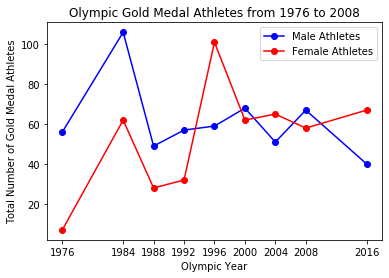

In [17]:
# Plot the charts and apply some styling
# Plot based on Summer Olympic files, all athletes

xaxis = year_list
tick_locations = []
for x in xaxis:
    tick_locations.append(x)


male, = plt.plot(year_list, male_list, marker="o", color="blue", label="Male Athletes")
female, = plt.plot(year_list, female_list, marker="o", color="red", label="Female Athletes")

plt.title("Olympic Gold Medal Athletes from 1976 to 2008")
plt.xlabel("Olympic Year")
plt.ylabel("Total Number of Gold Medal Athletes")
plt.xticks(tick_locations, year_list)
plt.legend(handles=[male, female], loc="best")

In [18]:
# View Summer Olympics file with all data from 1976 to 2008, check to see if plot looks better than the one above

summer_file = "Resources/Summer-Olympic-medals-1976-to-2008.csv"
summer = pd.read_csv(summer_file)
summer

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze
...,...,...,...,...,...,...,...,...,...,...,...
15428,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"GUENOT, Christophe",Men,FRA,France,M,Bronze
15429,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"KVIRKELIA, Manuchar",Men,GEO,Georgia,M,Gold
15430,Beijing,2008.0,Wrestling,Wrestling Gre-R,55 - 60kg,"RAHIMOV, Vitaliy",Men,AZE,Azerbaijan,M,Silver
15431,Beijing,2008.0,Wrestling,Wrestling Gre-R,60 - 66kg,"GUENOT, Steeve",Men,FRA,France,M,Gold


In [19]:
summer['Gender'].value_counts()

Men      9388
Women    5928
Name: Gender, dtype: int64

In [20]:
summer_female = summer[summer.Gender == "Women"]
summer_female

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze
6,Montreal,1976.0,Aquatics,Diving,10m platform,"VAYTSEKHOVSKAYA, Elena",Women,URS,Soviet Union,W,Gold
7,Montreal,1976.0,Aquatics,Diving,3m springboard,"POTTER-MCINGVALE, Cynthia",Women,USA,United States,W,Bronze
10,Montreal,1976.0,Aquatics,Diving,10m platform,"KNAPE-LINDBERGH, Ulrika",Women,SWE,Sweden,W,Silver
...,...,...,...,...,...,...,...,...,...,...,...
15395,Beijing,2008.0,Wrestling,Wrestling Free.,55 - 63kg,"KARTASHOVA, Alena",Women,RUS,Russia,W,Silver
15398,Beijing,2008.0,Wrestling,Wrestling Free.,55 - 63kg,"MILLER, Randi",Women,USA,United States,W,Bronze
15401,Beijing,2008.0,Wrestling,Wrestling Free.,48 - 55kg,"RENTERIA, Jackeline",Women,COL,Colombia,W,Bronze
15404,Beijing,2008.0,Wrestling,Wrestling Free.,55 - 63kg,"SHALYGINA, Yelena",Women,KAZ,Kazakhstan,W,Bronze


In [21]:
summer_male = summer[summer.Gender == "Men"]

In [22]:
summer_female_count = summer_female['Year'].value_counts()

In [23]:
reset_summer_female_count = summer_female_count.reset_index()
reset_summer_female_count.columns = ['year', 'female']
reset_summer_female_count

,year,female
0,2008.0,932
1,2004.0,899
2,2000.0,889
3,1996.0,777
4,1992.0,600
5,1988.0,535
6,1984.0,486
7,1980.0,429
8,1976.0,381


In [24]:
summer_male_count = summer_male['Year'].value_counts()

In [25]:
reset_summer_male_count = summer_male_count.reset_index()
reset_summer_male_count.columns = ['year', 'male']

In [26]:
# Merge summer count files
merge_summer_gender = pd.merge(reset_summer_male_count, reset_summer_female_count, on='year')
summer_gender = merge_summer_gender

In [27]:
summer_gender["total"] = summer_gender.male + summer_gender.female
summer_gender

,year,male,female,total
0,2000.0,1126,889,2015
1,2008.0,1110,932,2042
2,1992.0,1105,600,1705
3,2004.0,1099,899,1998
4,1996.0,1082,777,1859
5,1988.0,1011,535,1546
6,1984.0,973,486,1459
7,1980.0,958,429,1387
8,1976.0,924,381,1305


In [28]:
# Sort by Year in ascending order
summer_gender.sort_values('year', axis=0, ascending=True, inplace=True, na_position='first')
summer_gender

,year,male,female,total
8,1976.0,924,381,1305
7,1980.0,958,429,1387
6,1984.0,973,486,1459
5,1988.0,1011,535,1546
2,1992.0,1105,600,1705
4,1996.0,1082,777,1859
0,2000.0,1126,889,2015
3,2004.0,1099,899,1998
1,2008.0,1110,932,2042


In [29]:
summer_gender.astype({'year': 'int'})

,year,male,female,total
8,1976,924,381,1305
7,1980,958,429,1387
6,1984,973,486,1459
5,1988,1011,535,1546
2,1992,1105,600,1705
4,1996,1082,777,1859
0,2000,1126,889,2015
3,2004,1099,899,1998
1,2008,1110,932,2042


In [30]:
# Save the summer gender file as a csv file for plotting in html
#summer_gender.to_csv("Resources/summerGenderByYear.csv", index=False)

In [31]:
# Create lists for plotting
summer_year = summer_gender['year'].tolist()
summer_total = summer_gender['total'].tolist()
summer_male = summer_gender['male'].tolist()
summer_female = summer_gender['female'].tolist()

In [32]:
summer_xaxis = summer_total
summer_yaxis = summer_year

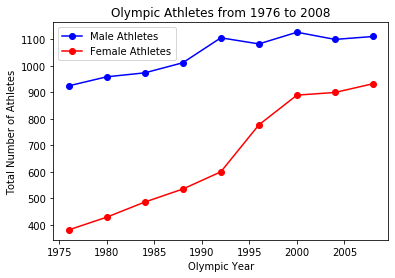

In [33]:
# Plot the charts and apply some styling
# Plot based on Summer Olympic files, all athletes

#x_axis = summer_year
#for x in x_axis:
#    tick_locations.append(x)

male, = plt.plot(summer_year, summer_male, marker="o", color="blue", label="Male Athletes")
female, = plt.plot(summer_year, summer_female, marker="o", color="red", label="Female Athletes")

plt.title("Olympic Athletes from 1976 to 2008")
plt.xlabel("Olympic Year")
plt.ylabel("Total Number of Athletes")
#plt.xticks(tick_locations, summer_year)
plt.legend(handles=[male, female], loc="best")

In [34]:
# Place holder only for Save image
#plt.savefig("Image/athletes.png")
#plt.show()